# EDA for Haberman dataset

In [4]:
import numpy as np
import matplotlib.pyplot as mp
import seaborn as sn
import pandas as pd


cancer= pd.read_csv("haberman.csv")
print(cancer)
print(cancer.columns)

     age  year  nodes  status
0     30    64      1       1
1     30    62      3       1
2     30    65      0       1
3     31    59      2       1
4     31    65      4       1
5     33    58     10       1
6     33    60      0       1
7     34    59      0       2
8     34    66      9       2
9     34    58     30       1
10    34    60      1       1
11    34    61     10       1
12    34    67      7       1
13    34    60      0       1
14    35    64     13       1
15    35    63      0       1
16    36    60      1       1
17    36    69      0       1
18    37    60      0       1
19    37    63      0       1
20    37    58      0       1
21    37    59      6       1
22    37    60     15       1
23    37    63      0       1
24    38    69     21       2
25    38    59      2       1
26    38    60      0       1
27    38    60      0       1
28    38    62      3       1
29    38    64      1       1
..   ...   ...    ...     ...
276   67    66      0       1
277   67  

### obervations
    1) The Haberman dataset consists of 306 rows and 4 columns.
    2) There are 3 independent variables:
          age: age of the patient at the time of operation
          year: year of operation
          nodes: number of positive axillary nodes detected.
    3) The dependent variable or class is the status of the patient.
         1) 1 indicates the patient survived 5 years or more.
         2) 2 indicates that the patient died within 5 years.
   

In [5]:
print(cancer["status"].value_counts())

1    225
2     81
Name: status, dtype: int64


This is a unbalanced dataset.
We will try to analyse this data to distinguish patients who die within 5 years from those survive 5 years or more. 

### Bivariate analysis

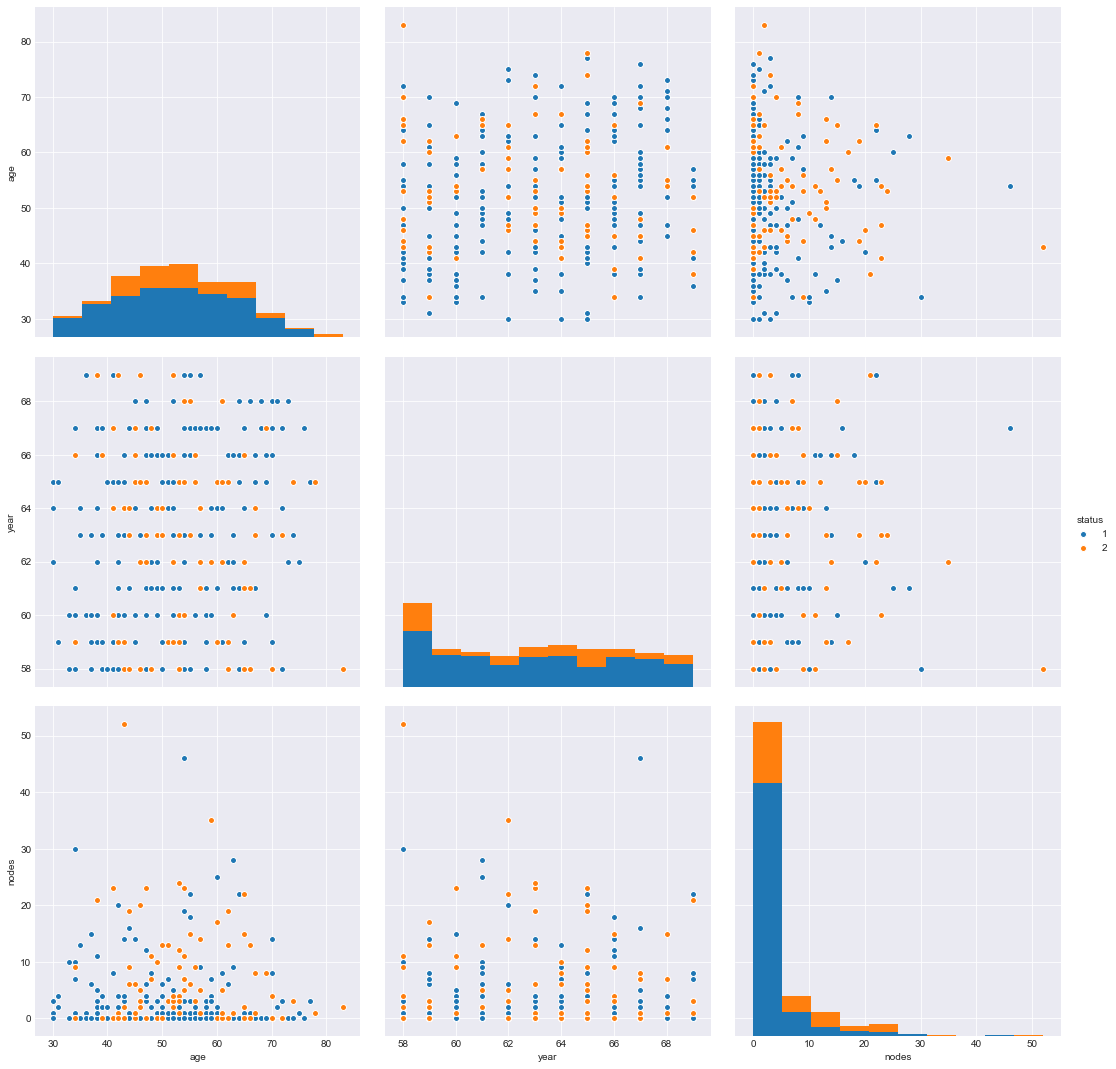

In [26]:
sn.set_style("darkgrid")
sn.pairplot(cancer, vars=["age","year","nodes"], hue= "status", size=5)


### observations
     1) Using bivariate analysis, we don't find a concrete segregation of cancer patients using any of the two parameters.
     2) we find that majority of cancer surviving patients(5 years or more) have lymph nodes axillary nodes between 0 and 5.
     3)The above conclusion is made using age and nodes as parameter.
     4)The data looks more understandable using (nodes,year) and (age,year) parameters.
     5) Using age and year parameters, operations after 1964 seems to have more cancer patients who survived 5 years or more.

## Univariate analysis

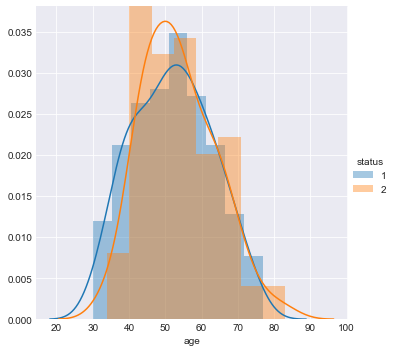

In [38]:
import warnings
warnings.filterwarnings("ignore")
sn.FacetGrid(cancer, hue= "status", size=5).map(sn.distplot, "age" ).add_legend()
mp.show()

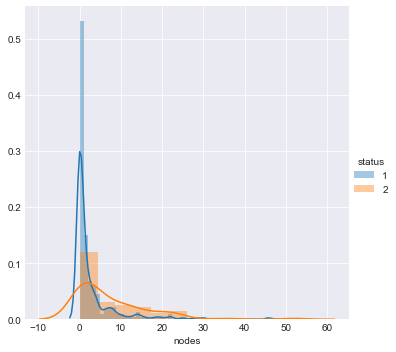

In [39]:
sn.FacetGrid(cancer, hue= "status", size=5).map(sn.distplot, "nodes" ).add_legend()
mp.show()

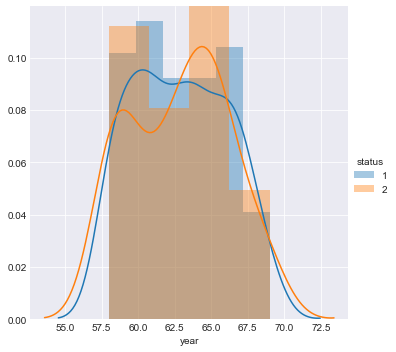

In [42]:
sn.FacetGrid(cancer, hue="status", size=5).map(sn.distplot, "year").add_legend()
mp.show()

### Observations
    1) There almost a complete overlap of both the categories of patients over one another in age and year of operation
       histograms. Hence We cannot make any important observations.
    2) We find that the majority of the cancer patients have nodes between 0 to 10 with concentration of category 1 patients
       higher in 0 to 5  

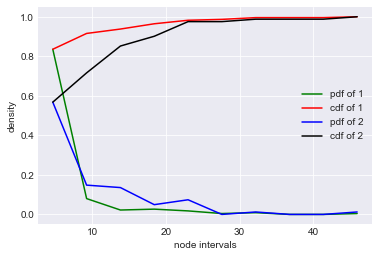

In [73]:
#using nodes
#those who survive 5 years or more
counts, bin_e = np.histogram(cancer_1["nodes"], bins=10, density= True)
pdf= counts/sum(counts)
cdf=np.cumsum(pdf)
mp.plot(bin_e[1:], pdf, color="green", label= "pdf of 1")
mp.plot(bin_e[1:], cdf, color= "red", label= "cdf of 1")

#those who survive less than 5 years
counts, bine_e= np.histogram(cancer_2["nodes"], bins=10, density=True)
pdf=counts/sum(counts)
cdf= np.cumsum(pdf)
mp.plot(bin_e[1:], pdf, color="blue", label= "pdf of 2")
mp.plot(bin_e[1:], cdf, color= "black", label= "cdf of 2")
mp.ylabel("density")
mp.xlabel("node intervals")
mp.legend()
mp.show()


### observations
    1) The cdf of cancer surviving patients(>=5 years) indicate that 80% of patients have nodes in the range of 0 to 5. 
    2) It can be roughly observed that cancer suriving patients(>=5 years) have less nodes compared to the ones who die 
       within 5 years.

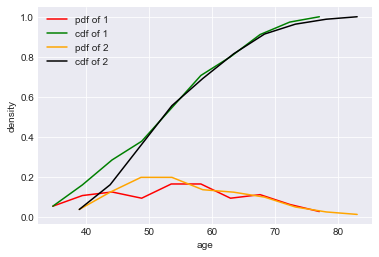

In [76]:
#using age
#1)those who survive 5 years or more
counts, bin_e = np.histogram(cancer_1["age"], bins=10, density= True)
pdf= counts/sum(counts)
cdf= np.cumsum(pdf)
mp.plot(bin_e[1:], pdf, color="red", label= "pdf of 1")
mp.plot(bin_e[1:], cdf, color="green", label="cdf of 1" )
#2)those who survive less than 5 years
counts, bin_e= np.histogram(cancer_2["age"], bins=10, density= True)
pdf= counts/sum(counts)
cdf= np.cumsum(pdf)
mp.plot(bin_e[1:],pdf, color= "orange", label= "pdf of 2")
mp.plot(bin_e[1:], cdf, color="black", label="cdf of 2")
mp.ylabel("density")
mp.xlabel("age")
mp.legend()
mp.show()


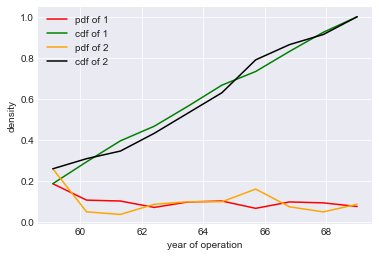

In [75]:
#using year of operation
#1)those who survive 5 years or more
counts, bin_e = np.histogram(cancer_1["year"], bins=10, density= True)
pdf= counts/sum(counts)
cdf= np.cumsum(pdf)
mp.plot(bin_e[1:], pdf, color="red", label= "pdf of 1")
mp.plot(bin_e[1:], cdf, color="green", label="cdf of 1" )
#2)those who survive less than 5 years
counts, bin_e= np.histogram(cancer_2["year"], bins=10, density= True)
pdf= counts/sum(counts)
cdf= np.cumsum(pdf)
mp.plot(bin_e[1:],pdf, color= "orange", label= "pdf of 2")
mp.plot(bin_e[1:], cdf, color="black", label="cdf of 2")
mp.ylabel("density")
mp.xlabel("year of operation")
mp.legend()
mp.show()

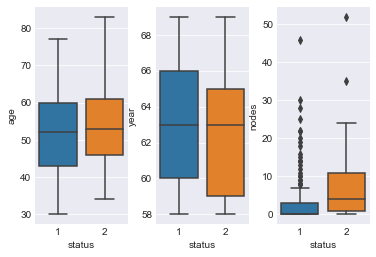

In [110]:
mp.subplot(1,3,1)
sn.boxplot(x="status",y="age", data=cancer)
mp.subplot(1,3,2)
sn.boxplot(x="status", y="year", data=cancer)
mp.subplot(1,3,3)
sn.boxplot(x="status", y= "nodes", data= cancer)
mp.subplots_adjust( wspace=0.3)
mp.show() #didn't understand the dots in the third graph and also how to increase the figure size?

### Observations
    1) We observe that operations done before 1960 have more cancer patients who died within 5 years.
    2) As observed from previous models, the concentration of cancer surviving patients(>=5 years) is really high in node
       range of 0-5.

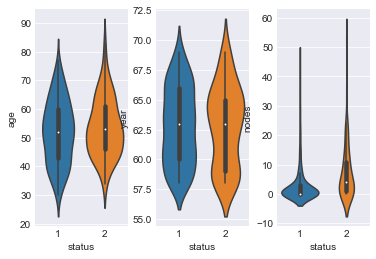

In [89]:
mp.subplot(1,3,1)
sn.violinplot(x="status", y="age", data= cancer)
mp.subplot(1,3,2)
sn.violinplot(x="status", y="year", data=cancer)
mp.subplot(1,3,3)
sn.violinplot(x="status", y= "nodes", data= cancer)
mp.subplots_adjust( wspace=0.3)
mp.show()

### Observations
    1) The patients who died within 5 years of cancer are more concentrated in the age range of 60-63 years.

In [104]:
cancer_11= cancer_1[["age","year","nodes"]]
print("1)the statistical data of patients surviving 5 or more years is as follows:\n",cancer_11.describe())
cancer_22= cancer_2[["age", "year", "nodes"]]
print("2)the statistical data of patients surviving less than 5 years is as follows:\n",cancer_22.describe())

1)the statistical data of patients surviving 5 or more years is as follows:
               age        year       nodes
count  225.000000  225.000000  225.000000
mean    52.017778   62.862222    2.791111
std     11.012154    3.222915    5.870318
min     30.000000   58.000000    0.000000
25%     43.000000   60.000000    0.000000
50%     52.000000   63.000000    0.000000
75%     60.000000   66.000000    3.000000
max     77.000000   69.000000   46.000000
2)the statistical data of patients surviving less than 5 years is as follows:
              age       year      nodes
count  81.000000  81.000000  81.000000
mean   53.679012  62.827160   7.456790
std    10.167137   3.342118   9.185654
min    34.000000  58.000000   0.000000
25%    46.000000  59.000000   1.000000
50%    53.000000  63.000000   4.000000
75%    61.000000  65.000000  11.000000
max    83.000000  69.000000  52.000000
52.0


### Observations
    1) The patients who survived less than 5 years have a mean of 7.45 whereas those who suvived 5 years or more have a mean
       of 2.79.
    2)From all the data models, it can be observed that nodes parameter has been quite useful to analyse the cancer survival
      of patients to some extent.